In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt


fiber_bend_data= pd.read_csv('./data/FiberBend/Raw25-15-1.csv')

print fiber_bend_data.head()

df = fiber_bend_data[1:]
print df.head()

      Time Extension      Load
0    (sec)      (mm)       (N)
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [7]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [8]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
print df.head()

      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [9]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs Load', fontsize=20)
    plt.xlabel('Extension (mm)', fontsize=18)
    plt.ylabel('Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()


In [15]:
def toFloat(x):
    return float(x)

def seaborn(df):
    ext = df['Extension'].apply(toFloat)
    load = df['Load'].apply(toFloat)
        
    sns.jointplot(ext,load)

    

In [13]:
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
        

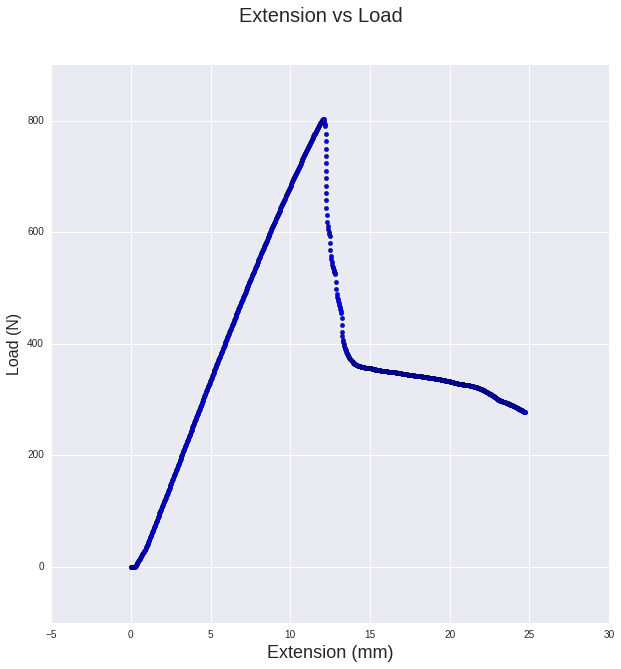

In [14]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
df = rotateGraph(df)
graphDataframe(df)

In [31]:
# df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
# df = rotateGraph(df)
# seaborn(df)

In [34]:
def flexuralStress(df):
    """Given Load and Extension, return a dataframe with 
    sress vs strain"""
    
    b = 76.2 # Width of the test beam in mm  (3 in)
    d = 6.35 # Thickness of test beam in mm (1/4 in)
    L = 190 # span of the support in mm (19 cm)
    
    F = df['Load'] # Load in N
    D = df['Extension'] # Extension (deflection of center) in mm
    
    stresses = []
    strains = []
    
    for i in F:
        stress = (3 * i * L) / (2 * b * np.square(d))
        stresses.append(stress)
    
    for j in D:
        strain = (6 * j * d) / (np.square(L))
        strains.append(strain)
    
    return [stresses,strains]
    


In [37]:
def graphStressStrain(data):
    fig = plt.figure()
    fig.set_size_inches(10,10)  # OR
    stress = data[0]
    strain = data[1]
    plt.scatter(strain, stress)

    fig.suptitle('Strain vs Stress', fontsize=20)
    plt.xlabel('Strain (mm)', fontsize=18)
    plt.ylabel('Stress (MPa)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()


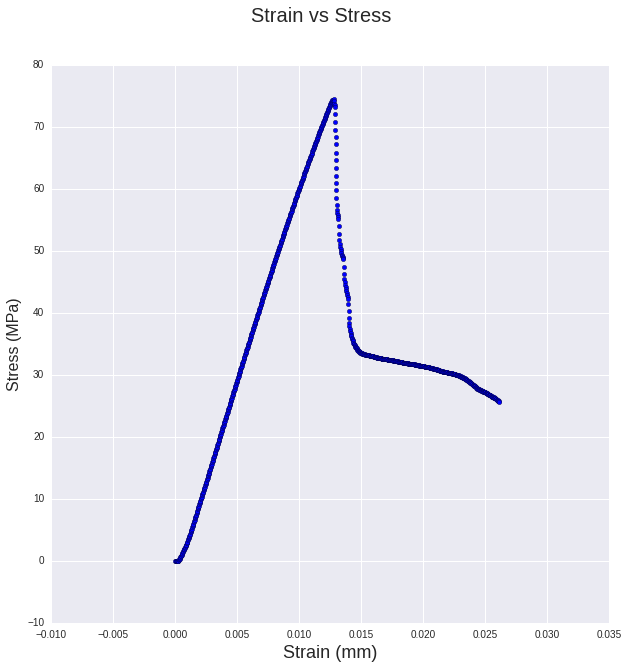

In [38]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
df = rotateGraph(df)
svs = flexuralStress(df)
graphStressStrain(svs)